In [5]:
#!/usr/bin/python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from pathlib import Path
from matplotlib.pyplot import figure, draw



#########################################################################
#   Configurações globais do grafico
plt.rcParams['axes.linewidth']=2
plt.rc('font', size=18)         # controls default text sizes
#########################################################################

#########################################################################
#   Configurações para salvar e plotar o grafico
BASE_PATH = os.getcwd()
PATH_SVG=BASE_PATH+"/../../../../../inkscape/cap6/crankshaft/"
PATH_EPS=BASE_PATH+"/../../../../../eps/cap6/crankshaft/"
fname = "speedup_mpi_lumped_17810"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"
PLOT_FIG = True
SAVE_FIG = True
#########################################################################



#   Leitura do csv para pandas
##### Resultado para CentralDifferenceLinear Local Method - LUMPED
#df = pd.read_csv('./data/Crankshaft_17810_LUMPED_P1-P2-P4.csv', sep=";", skiprows=[0])
df = pd.read_csv('./data/crankshaft_17810_lumped_p1-p2-p4_mpi.csv', sep=";")
pd.set_option('expand_frame_repr', False, 'display.max_rows', 999, 'display.max_columns', 999)
df

NumberNodes  P1_ElapsedTime  P2_ElapsedTime  P4_ElapsedTime  P1_SpeedUp  P2_SpeedUp  P4_SpeedUp  P1_Efficiency  P2_Efficiency  P4_Efficiency  P1_L2-Cache-Miss(%)  P2_L2-Cache-Miss(%)  P4_L2-Cache-Miss(%)  P1_ParallelRegion(%)  P2_ParallelRegion(%)  P4_ParallelRegion(%)
0            1          9.7037         61.5670        889.9984      1.0000      1.0000      1.0000         1.0000         1.0000         1.0000                 0.15                 0.20                 0.22                 99.87                 99.87                 99.92
1            2          5.1718         34.1691        475.0730      1.8762      1.8018      1.8733         0.9381         0.9009         0.9366                 0.15                 0.21                 0.22                 98.13                 93.24                 95.41
2            4          2.4820         16.2893        235.8056      3.9096      3.7795      3.7742         0.9774         0.9448         0.9435                 0.10                 0.22                 0.22                 91.70                 91.54                 89.80
3            8          1.2959          8.1466        117.5081      7.4880      7.5573      7.5739         0.9360         0.9446         0.9467                 0.10                 0.24                 0.22                 94.26                 96.28                 95.65
4           16          0.6368          3.8889         59.2898     15.2382     15.8314     15.0109         0.9523         0.9894         0.9381                 0.09                 0.20                 0.23                 95.42                 95.41                 94.19
5           20          0.5157          3.1118         46.0957     18.8165     19.7850     19.3076         0.9408         0.9892         0.9653                 0.09                 0.16                 0.22                 94.79                 95.01                 96.99
6           25          0.4151          2.4602         38.3021     23.3767     25.0252     23.2362         0.9350         1.0010         0.9294                 0.09                 0.15                 0.23                 93.39                 95.16                 93.10
7           30          0.3558          1.9991         30.8434     27.2729     30.7973     28.8553         0.9090         1.0265         0.9618                 0.10                 0.13                 0.24                 84.05                 89.21                 90.37

In [6]:
# Rename columns
df_speedup = df.rename(columns={"P1_SpeedUp": "P1", "P2_SpeedUp": "P2", "P4_SpeedUp": "P4"})
df_speedup.columns

Index(['NumberNodes', 'P1_ElapsedTime', 'P2_ElapsedTime', 'P4_ElapsedTime',
       'P1', 'P2', 'P4', 'P1_Efficiency', 'P2_Efficiency', 'P4_Efficiency',
       'P1_L2-Cache-Miss(%)', 'P2_L2-Cache-Miss(%)', 'P4_L2-Cache-Miss(%)',
       'P1_ParallelRegion(%)', 'P2_ParallelRegion(%)', 'P4_ParallelRegion(%)'],
      dtype='object')

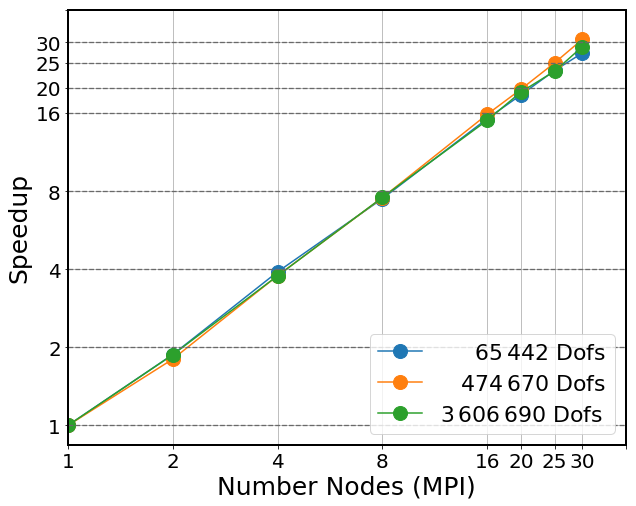

In [7]:
select_columns=['NumberNodes', 'P1', 'P2', 'P4']

fig = df_speedup[select_columns].plot(
    kind='line', 
    x='NumberNodes', 
    linestyle='-', 
    marker='o', 
    markersize=14,
    figsize=(10, 8)
).get_figure()

plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
plt.xticks([1, 2, 4, 8, 16, 20, 25, 30, 40], [1, 2, 4, 8, 16, 20, 25, 30], fontsize=20)
plt.yticks([1, 2, 4, 8, 16, 20, 25, 30, 40], [1, 2, 4, 8, 16, 20, 25, 30], fontsize=20)

lines = [1, 2, 4, 8, 16, 20, 25, 30]
for i in lines:
    plt.axhline(i, linestyle='--', color='dimgrey', linewidth='1.3') 

plt.xlabel('Number Nodes (MPI)', fontsize=25)
plt.ylabel('Speedup', fontsize=25)
color='tab:blue'
plt.legend(loc=(0.05, .72), frameon = True)
plt.legend(labels=["     $65\,442$ Dofs", "   $474\,670$ Dofs", "$3\,606\,690$ Dofs"], fontsize=22)
plt.grid()
plt.show()

In [8]:
#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [9]:
# Rename columns
df_efficiency = df.rename(columns={"P1_Efficiency": "P1", "P2_Efficiency": "P2", "P4_Efficiency": "P4"})
df_efficiency.columns

Index(['NumberNodes', 'P1_ElapsedTime', 'P2_ElapsedTime', 'P4_ElapsedTime',
       'P1_SpeedUp', 'P2_SpeedUp', 'P4_SpeedUp', 'P1', 'P2', 'P4',
       'P1_L2-Cache-Miss(%)', 'P2_L2-Cache-Miss(%)', 'P4_L2-Cache-Miss(%)',
       'P1_ParallelRegion(%)', 'P2_ParallelRegion(%)', 'P4_ParallelRegion(%)'],
      dtype='object')

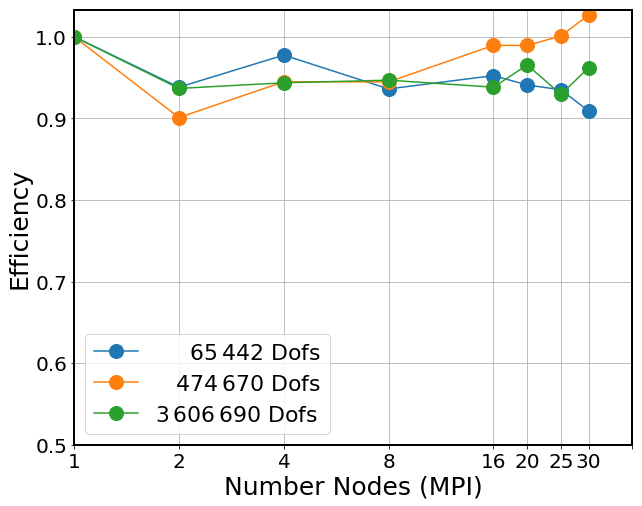

In [10]:
select_columns=['NumberNodes', 'P1', 'P2', 'P4']

fig = df_efficiency[select_columns].plot(
    kind='line', 
    x='NumberNodes', 
    linestyle='-', 
    marker='o', 
    markersize=14,
    figsize=(10, 8)
).get_figure()

plt.xscale('log', basex=2)
# plt.yscale('log', basey=2)
plt.xticks([1, 2, 4, 8, 16, 20, 25, 30, 40], [1, 2, 4, 8, 16, 20, 25, 30], fontsize=20)
plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0], [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], fontsize=20)

# lines = [1, 2, 4, 8, 16]
# for i in lines:
#     plt.axhline(i, linestyle='--', color='dimgrey', linewidth='1.3') 

plt.xlabel('Number Nodes (MPI)', fontsize=25)
plt.ylabel('Efficiency', fontsize=25)
color='tab:blue'
plt.legend(loc=(0.05, .72), frameon = True)
plt.legend(labels=["     $65\,442$ Dofs", "   $474\,670$ Dofs", "$3\,606\,690$ Dofs"], fontsize=22)
plt.grid()
plt.show()

In [11]:
fname = "efficiency_mpi_lumped_17810"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"

#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [12]:
# Select columns
select_columns=['NumberNodes', 'P1_L2-Cache-Miss(%)', 'P2_L2-Cache-Miss(%)', 'P4_L2-Cache-Miss(%)']
df_cache = df[select_columns].copy()
# Calculate percentage multiply by 100.
df_cache["P1_L2-Cache-Miss(%)"] = df_cache["P1_L2-Cache-Miss(%)"]*100
df_cache["P2_L2-Cache-Miss(%)"] = df_cache["P2_L2-Cache-Miss(%)"]*100
df_cache["P4_L2-Cache-Miss(%)"] = df_cache["P4_L2-Cache-Miss(%)"]*100
df_cache

NumberNodes  P1_L2-Cache-Miss(%)  P2_L2-Cache-Miss(%)  P4_L2-Cache-Miss(%)
0            1                 15.0                 20.0                 22.0
1            2                 15.0                 21.0                 22.0
2            4                 10.0                 22.0                 22.0
3            8                 10.0                 24.0                 22.0
4           16                  9.0                 20.0                 23.0
5           20                  9.0                 16.0                 22.0
6           25                  9.0                 15.0                 23.0
7           30                 10.0                 13.0                 24.0

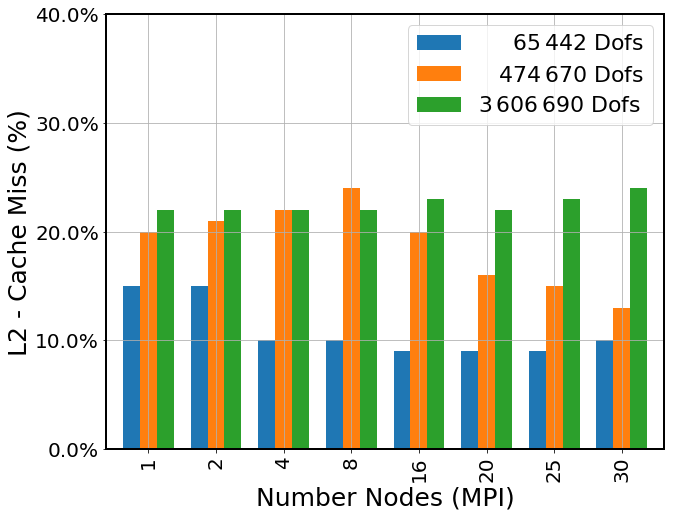

In [13]:
fig = df_cache[["NumberNodes", "P1_L2-Cache-Miss(%)", "P2_L2-Cache-Miss(%)", "P4_L2-Cache-Miss(%)"]].plot(
    kind='bar', 
    x='NumberNodes',
    width=0.75,
    figsize=(10, 8)
).get_figure()

# plt.xticks([1, 2, 4, 8, 16, 20, 40, 50], [1, 2, 4, 8, 16, 20, 40, 50])
plt.xticks(fontsize=20)
plt.yticks([0.0, 10.0, 20.0, 30.0, 40.0], ["0.0%", "10.0%", "20.0%", "30.0%", "40.0%"], fontsize=20)

# lines = [1, 2, 4, 8, 16]
# for i in lines:
#     plt.axhline(i, linestyle='--', color='dimgrey', linewidth='1.3') 

plt.xlabel('Number Nodes (MPI)', fontsize=25)
plt.ylabel('L2 - Cache Miss (%)', fontsize=25)
color='tab:blue'
plt.legend(loc=(0.05, .72), frameon = True)
plt.legend(labels=["     $65\,442$ Dofs", "   $474\,670$ Dofs", "$3\,606\,690$ Dofs"], fontsize=22)
plt.grid()
plt.show()

In [14]:
fname = "l2-cache-miss_mpi_lumped_17810"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"

#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [15]:
# Select columns
select_columns=['NumberNodes', 'P1_ParallelRegion(%)', 'P2_ParallelRegion(%)', 'P4_ParallelRegion(%)']
df_region = df[select_columns].copy()
df_region

NumberNodes  P1_ParallelRegion(%)  P2_ParallelRegion(%)  P4_ParallelRegion(%)
0            1                 99.87                 99.87                 99.92
1            2                 98.13                 93.24                 95.41
2            4                 91.70                 91.54                 89.80
3            8                 94.26                 96.28                 95.65
4           16                 95.42                 95.41                 94.19
5           20                 94.79                 95.01                 96.99
6           25                 93.39                 95.16                 93.10
7           30                 84.05                 89.21                 90.37

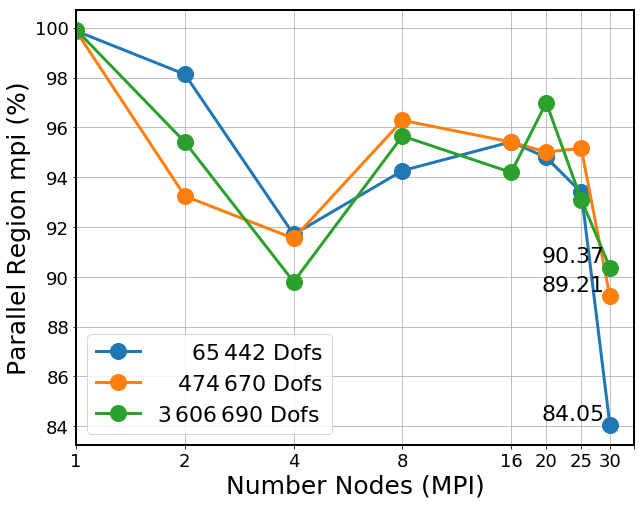

In [16]:
fig = df_region.plot(
    kind='line', 
    x='NumberNodes',
    marker='o',
    markersize=16,
#     alpha=0.3,
    linewidth=3.0,
#     ylim=(0,300),
    figsize=(10, 8)
).get_figure()

plt.xscale('log', basex=2)
# plt.yscale('log', basey=2)
plt.xticks([1, 2, 4, 8, 16, 20, 25, 30, 35], [1, 2, 4, 8, 16, 20, 25, 30])
# plt.yticks([50.0, 60.0, 70.0, 80.0, 90.0, 95.0, 100.0], [50.0, 60.0, 70.0, 80.0, 90.0, 95.0, 100.0])


# print(int(list(df_region.loc[7])[1]))
xs=[list(df_region.loc[7])[0]]+[list(df_region.loc[7])[0]]+[list(df_region.loc[7])[0]]
#    [list(df_region.loc[3])[0]]+[list(df_region.loc[3])[0]]+[list(df_region.loc[3])[0]]
ys=[list(df_region.loc[7])[1]]+[list(df_region.loc[7])[2]]+[list(df_region.loc[7])[3]]
#    [list(df_region.loc[3])[1]]+[list(df_region.loc[3])[2]]+[list(df_region.loc[3])[3]]

# zip joins x and y coordinates in pairs
for x,y in zip(xs,ys):

    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 fontsize=22,
                 xytext=(-5,5), # distance from text to points (x,y)
                 ha='right') # horizontal alignment can be left, right or center



# lines = [1, 2, 4, 8, 16]
# for i in lines:
#     plt.axhline(i, linestyle='--', color='dimgrey', linewidth='1.3') 

plt.xlabel('Number Nodes (MPI)', fontsize=25)
plt.ylabel('Parallel Region mpi (%)', fontsize=25)
color='tab:blue'
plt.legend(loc=(0.35, 0.22), frameon = True)
plt.legend(labels=["     $65\,442$ Dofs", "   $474\,670$ Dofs", "$3\,606\,690$ Dofs"], fontsize=22)
plt.grid()
plt.show()

In [17]:
fname = "parallel_region_mpi_lumped_17810"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"

#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>